# Deep Neural Network (DNN)

**Author**: Benjamin Urben<br>
**Email**: burben@student.ethz.ch / benjamin.urben@hotmail.ch<br>
**Context**: Master Thesis on "Use of Machine Learning in the Design and Analysis for Steel Connections"<br>
**Institution**: ETH Zürich, Institute of Structural Engineering (IBK)

**Description**:

Deep Neural Network implementation and application, based on a dataset of steel frame corners with given features (geometric and material parameters) and targets (Moment and Shear Resistance). The DNN is built, trained and evaluated. 

**Dependencies**: 
- `DNN.py`
- `Datareader.py`
- `Settings.py`
- `Plot_Functions.py`

**Generates**:
- `Saved Models\DNN_Model_Full_V3\DNN_Model_Full_V3.pth`

## Setup

### Import

In [1]:
import os
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import copy
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from scipy.interpolate import interp1d

from scipy.stats import binned_statistic_2d
from scipy.stats import norm
from scipy import stats

import torch
import torch.nn as nn
import torch.optim as optim

from Settings import Directory, Plotting_Parameters

import DataReader
importlib.reload(DataReader)
from DataReader import DataReader

import DNN
importlib.reload(DNN)
from DNN import DNN

import warnings
warnings.filterwarnings('ignore')

### Directory

In [11]:
directory = Directory()
plot_params = Plotting_Parameters()

model_name = "DNN_Model_Full_V3"

DATA_FILE = r"Data\Knee_Connection_Output_red.csv"
MODEL_SAVE_PATH = os.path.join("Saved Models", model_name)

directory.create_folder(MODEL_SAVE_PATH)

MODEL_SAVE_FILE = os.path.join(MODEL_SAVE_PATH, f"{model_name}.pth")

Root Directory set to:  c:\Users\benja\OneDrive\Desktop\Masterarbeit\Code\10_Neural_Networks


In [12]:
# Disable if plots should not be saved
plot_params.save_figures = True

### Load Data

In [13]:
datareader = DataReader()

Root Directory set to:  c:\Users\benja\OneDrive\Desktop\Masterarbeit\Code\10_Neural_Networks
Extended_Database_filtered_converted.csv
extended_profiles_iterV2_1.csv
extended_profiles_iter_1.csv
GAL_Generated_Data.csv
Knee_Connection_Output_red.csv
Knee_parallel_I_Off0_Output_red_Q1.xlsx
Knee_parallel_I_Off0_Output_red_Q4.xlsx
Knee_parallel_I_Output_Q1.xlsx
Knee_parallel_I_Output_red_Q4.xlsx
Knee_perpendicular_n.stiff_Off0_Output_red_Q1.xlsx
Knee_perpendicular_n.stiff_Off0_Output_red_Q4.xlsx
Knee_perpendicular_n.stiff_Output_red_Q1.xlsx
Knee_perpendicular_n.stiff_Output_red_Q4.xlsx
Knee_widener_I_Output_Off0_red_Q1.xlsx
Knee_widener_I_Output_red_Q1.xlsx
_OLD


In [14]:
df_full = datareader.load("Knee_Connection_Output_red.csv")

Knee_Connection_Output_red.csv: (714385, 53)


#### Initialize Model

In [15]:
model = DNN()

model.config['epochs'] = 1000
model.config['dropout_prob'] = 0.00
model.config['neurons_per_layer'] = [64, 32, 16]
model.config['seed'] = 42
model.config['learning_rate'] = 0.005

#### Data Reduction

Data reduction factor states by how many features dataset should be reduced. Reduces dimensionality, but also length of the dataset. Use `data_reduction_factor=5` for a balanced reduction, which is easy to compute and still representative of the data.

In [16]:
model.data['data_reduction_factor'] = 0

In [17]:
df, model = datareader.reduce(df_full, model)
print(df.shape)

(714385, 53)


## Load Model

In [18]:
model = DNN()
model = torch.load(MODEL_SAVE_FILE)
df = df_full.loc[model.data['data_indeces']]

for key, value in model.config.items():
    print(key, value)

batch_size 256
epochs 2500
learning_rate 0.001
test_size 0.1
val_size 0.1
print_logs True
dropout_prob 0.0
num_layers 3
neurons_per_layer [128, 64, 32, 16, 8]
use_batch_norm True
seed 42
description Different to V2, do not Cat_h & Cath_stiffc features


If Model loaded skip **Create Model** section.

## Create Model (Skip if Model is loaded)

In [27]:
for line in model.config:
    print(line+":", model.config[line])

batch_size: 256
epochs: 1000
learning_rate: 0.005
test_size: 0.1
val_size: 0.1
print_logs: True
dropout_prob: 0.0
num_layers: 3
neurons_per_layer: [64, 32, 16]
use_batch_norm: False
seed: 42


### Prepare Data, Build Model, Train Model

In [28]:
model.prepare_data(df)
model.build()
model.train()

Number of training samples: 571508
Number of validation samples: 71438
Number of testing samples: 71439
Epoch 1/1000, Train Loss: 0.002563, Val Loss: 0.000982
Epoch 2/1000, Train Loss: 0.000832, Val Loss: 0.000628
Epoch 3/1000, Train Loss: 0.000619, Val Loss: 0.000616
Epoch 4/1000, Train Loss: 0.000504, Val Loss: 0.000552
Epoch 5/1000, Train Loss: 0.000432, Val Loss: 0.000403
Epoch 6/1000, Train Loss: 0.000385, Val Loss: 0.000482
Epoch 7/1000, Train Loss: 0.000348, Val Loss: 0.000327
Epoch 8/1000, Train Loss: 0.000323, Val Loss: 0.000230
Epoch 9/1000, Train Loss: 0.000307, Val Loss: 0.000339
Epoch 10/1000, Train Loss: 0.000286, Val Loss: 0.000438
Epoch 11/1000, Train Loss: 0.000275, Val Loss: 0.000271
Epoch 12/1000, Train Loss: 0.000266, Val Loss: 0.000261
Epoch 13/1000, Train Loss: 0.000256, Val Loss: 0.000233
Epoch 14/1000, Train Loss: 0.000252, Val Loss: 0.000220
Epoch 15/1000, Train Loss: 0.000246, Val Loss: 0.000223
Epoch 16/1000, Train Loss: 0.000241, Val Loss: 0.000274
Epoch 17/

### Save Model

In [ ]:
if not load_model:
    model.save(MODEL_SAVE_FILE)

Model saved to: Saved Models\DNN_Model_Full\DNN_Model_Full.pth


## Evaluate Test Data

### Coefficient of Variation $R^2$

In [19]:
y_pred, test_loss = model.evaluate()
y_true = model.y_test.numpy()
model_metrics = model.get_metrics(y_pred.numpy())
print(model_metrics)

{'MSE': 3.0903888e-05, 'RMSE': 0.0055591264, 'MAE': 0.0037376885, 'R2': 0.9979280408006161, 'MCDMS': 0.005261143387924681, 'MCDUS': 0.057724938294168596}


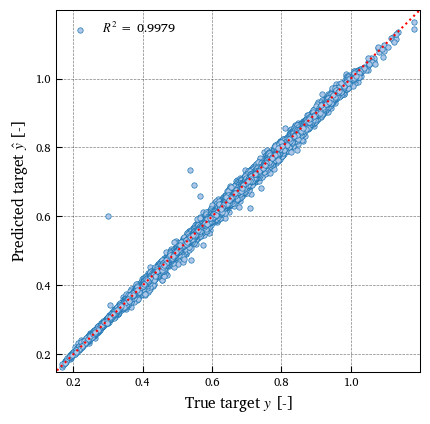

In [11]:
fig, ax = plt.subplots(figsize=plot_params.get_figsize(0.75,1.0))

plt.scatter(y_true, y_pred.numpy(), s=15, 
            facecolor=plot_params.morecolors[1], 
            edgecolors=plot_params.morecolors[0],
            linewidth=0.5,
            zorder=2,
            label=rf'$R^2$ = {model_metrics["R2"]:.4f}')
plt.plot([-1,2], [-1, 2], 
         color='red',
         linestyle='dotted',
         linewidth=1.5, 
         zorder=2)

plt.xlim([0.9*min(y_true), max(y_true)+0.1*min(y_true)])
plt.ylim([0.9*min(y_true), max(y_true)+0.1*min(y_true)])

plt.legend()
plt.grid(True, which='major', color='k', linestyle='--',linewidth=0.5, alpha=0.5, zorder=0)

plt.ylabel(r"Predicted target $\hat{y}$ [-]")
plt.xlabel("True target $y$ [-]")

if plot_params.save_figures:
    plt.savefig(r'Plots\DNN_Evaluation.png', format='png')

plt.show()

### Uncertainity with Monte Carlo Dropout

In [31]:
print('Dropout rate from training: {}'.format(model.config['dropout_prob']))

Dropout rate from training: 0.0


If Dropout rate is $=0$ for training, then set Dropout rate $>0$ for evalution. Else the Monte Carlo Dropout will only deliver singular values.

`model.mc_dropout_uncertainity` delivers $N_{\text{MCforwardpasses}}$ prediction on the test set, hence `preds_mc_dropout` will have the shape ($N_{\text{MCforwardpasses}},N_{\text{testset}}$). For each test set sample $N_{\text{MCforwardpasses}}$ have been made, from which the mean $\mu_{\text{MC}}$ and the variance $\sigma_{\text{MC}}^2$ can be calculated. From this the **coefficient of variation** can be calulcated as $\sigma_{\text{MC}} / \mu_{\text{MC}}$, which is the uncertainty of the test sample.

In [32]:
preds_mc_dropout_mean, preds_mc_dropout_std, preds_mc_dropout = model.mc_dropout_uncertainty(num_samples=1000,
                                                                                             dropout_prob=0.1)

Get uncertainty on test set:

In [33]:
mcd_var = preds_mc_dropout.var(axis=0)
mcd_mean = preds_mc_dropout.mean(axis=0)
mcd_std = preds_mc_dropout.std(axis=0)

uncertainty = np.abs(mcd_std) / mcd_mean

Get error on test set:

In [34]:
y_truth = model.y_test.numpy()
y_pred = y_pred.numpy()
error = y_pred - y_truth
relative_error = error / (y_truth+1e-4)
relative_deviation = (relative_error)*100

**Error depending on predicted target**

Visualy, the _uncertainty_ does not seem to correlate too much with the _error_. However, for our **AL**, this correlation would be beneficial. Hence, we will investigate the existence and extent of this correlation further.

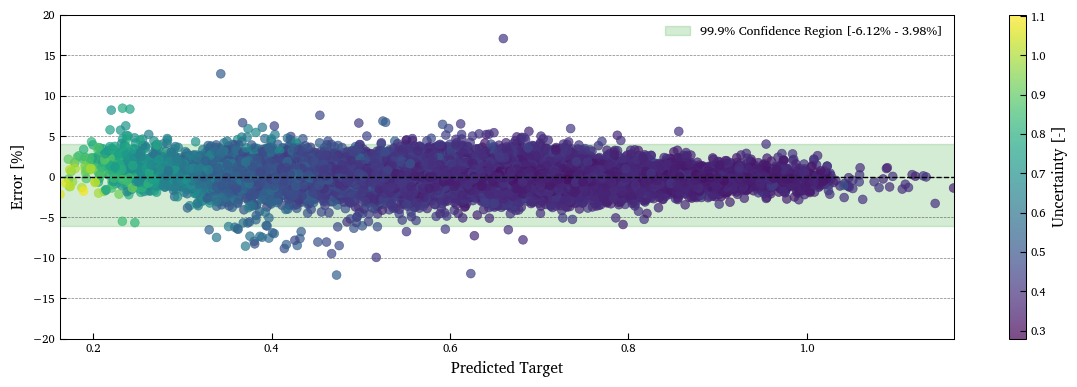

In [35]:
fig, ax = plt.subplots(figsize=(12,4))

confidence = 99.9

percentile_lower, percentile_upper = np.percentile(relative_deviation, [(100-confidence)/2, confidence-(100-confidence)/2])

plt.scatter(y_pred, relative_deviation,
            s=40, 
            c=uncertainty,
            linewidth=0.5,
            alpha=0.7,
            zorder=2)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1.0, zorder=2)

plt.fill_between(
    x=[0, 1.2],  # Cover full x-range
    y1=percentile_lower,
    y2=percentile_upper,
    color=plot_params.morecolors[4],
    alpha=0.2,
    label=f"{confidence}% Confidence Region [{percentile_lower:.2f}% - {percentile_upper:.2f}%]",
    zorder=0
)

plt.colorbar(label='Uncertainty [-]')

plt.xlabel("Predicted Target")
plt.ylabel("Error [%]")

plt.xlim([min(y_pred),max(y_pred)])
plt.ylim([-20,20])

plt.yticks(np.arange(-20, 20+1, 5))
plt.grid(True, axis='y', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)

plt.legend()

plt.tight_layout()
plt.show()

### Uncertainty and Error Correlation

**Mean and deviation of uncertainty and error for each target bin**

By plotting the mean and deviation of the _uncertainty_ and _error_ for each target bin, a _positive_ correlation between the two can be noted. Lower predicted targets are more prone to errors, while also having a large uncertainty attached to it.

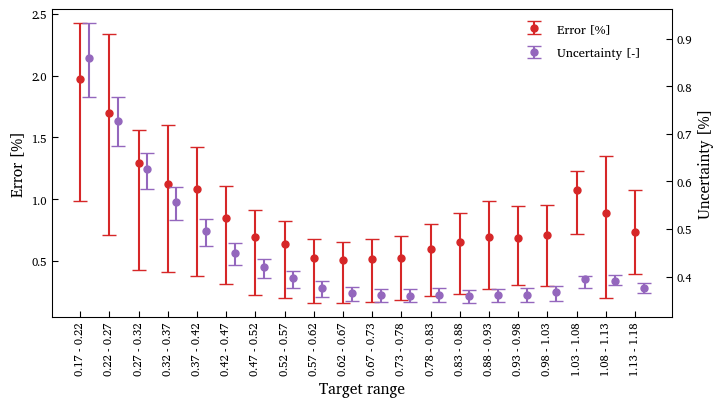

In [36]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()

counts, bins = np.histogram(y_true, bins=20)

for i in range(len(counts)):
    mask = np.logical_and(y_true >= bins[i], y_true < bins[i+1])

    error_bin = np.abs(relative_deviation)[mask]
    uncertainty_bin = uncertainty[mask]

    error_bin_mean = error_bin.mean()
    uncertainty_bin_mean = uncertainty_bin.mean()

    confidence = 50
    uncertainty_lower_val = np.percentile(uncertainty_bin, (100 - confidence) / 2)
    uncertainty_upper_val = np.percentile(uncertainty_bin, confidence + (100 - confidence) / 2)
    error_lower_val = np.percentile(error_bin, (100 - confidence) / 2)
    error_upper_val = np.percentile(error_bin, confidence + (100 - confidence) / 2)

    uncertainty_lower_bound = uncertainty_bin_mean - uncertainty_lower_val
    uncertainty_upper_bound = uncertainty_upper_val - uncertainty_bin_mean
    error_lower_bound = error_bin_mean - error_lower_val
    error_upper_bound = error_upper_val - error_bin_mean

    uncertainty_bounds = np.array([[uncertainty_lower_bound], [uncertainty_upper_bound]])
    error_bounds = np.array([[error_lower_bound], [error_upper_bound]])

    if i==0:
        label1='Error [%]'
        label2='Uncertainty [-]'
    else:
        label1=None
        label2=None
    ax1.errorbar(i, error_bin_mean, yerr=error_bounds, fmt='o', color=plot_params.colors[3], markersize=5, capsize=5,
                 label=label1)
    ax2.errorbar(i+0.3, uncertainty_bin_mean, yerr=uncertainty_bounds, fmt='o', color=plot_params.colors[4], markersize=5, capsize=5,
                 label=label2)

ax1.set_xlabel('Target range')
ax1.set_ylabel('Error [%]')
ax2.set_ylabel('Uncertainty [%]')
ax1.set_xticks(np.arange(len(counts)))
ax1.set_xticklabels([f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(counts))],rotation=90)
ax1.legend(loc=[0.75, 0.9])
ax2.legend(loc=[0.75, 0.82])

plt.show()

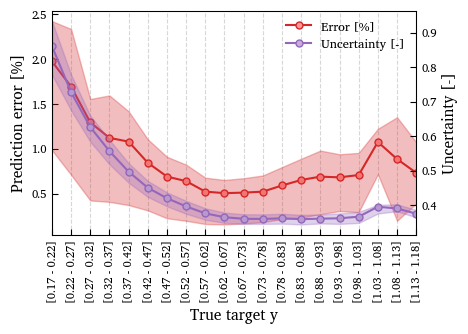

In [37]:
fig, ax1 = plt.subplots(figsize=plot_params.get_figsize(0.75))
ax2 = ax1.twinx()

counts, bins = np.histogram(y_true, bins=20)
x_vals = np.arange(len(counts))

error_means = []
error_lowers = []
error_uppers = []

uncertainty_means = []
uncertainty_lowers = []
uncertainty_uppers = []

for i in range(len(counts)):
    mask = np.logical_and(y_true >= bins[i], y_true < bins[i+1])

    error_bin = np.abs(relative_deviation)[mask]
    uncertainty_bin = uncertainty[mask]

    if len(error_bin) == 0 or len(uncertainty_bin) == 0:
        error_means.append(np.nan)
        error_lowers.append(np.nan)
        error_uppers.append(np.nan)
        uncertainty_means.append(np.nan)
        uncertainty_lowers.append(np.nan)
        uncertainty_uppers.append(np.nan)
        continue

    error_mean = error_bin.mean()
    uncertainty_mean = uncertainty_bin.mean()

    confidence = 50
    error_lower = np.percentile(error_bin, (100 - confidence) / 2)
    error_upper = np.percentile(error_bin, confidence + (100 - confidence) / 2)
    uncertainty_lower = np.percentile(uncertainty_bin, (100 - confidence) / 2)
    uncertainty_upper = np.percentile(uncertainty_bin, confidence + (100 - confidence) / 2)

    error_means.append(error_mean)
    error_lowers.append(error_lower)
    error_uppers.append(error_upper)
    uncertainty_means.append(uncertainty_mean)
    uncertainty_lowers.append(uncertainty_lower)
    uncertainty_uppers.append(uncertainty_upper)

# Plot Error with fill
ax1.plot(x_vals, error_means, 'o-', 
         color=plot_params.colors[3],
         markerfacecolor=plot_params.morecolors[7], 
         markeredgecolor=plot_params.morecolors[6],
         label='Error [%]', markersize=5,zorder=2)
ax1.fill_between(x_vals, error_lowers, error_uppers, color=plot_params.colors[3], alpha=0.3, zorder=2)

# Plot Uncertainty with fill
offset_x = x_vals
ax2.plot(offset_x, uncertainty_means, 'o-', 
         color=plot_params.colors[4],
         markerfacecolor=plot_params.morecolors[9], 
         markeredgecolor=plot_params.morecolors[8],
         markersize=5,
         label='Uncertainty [-]', zorder=2)
ax2.fill_between(offset_x, uncertainty_lowers, uncertainty_uppers, color=plot_params.colors[4], alpha=0.3, zorder=2)

ax1.set_xlabel('True target y')
ax1.set_ylabel('Prediction error [%]')
ax2.set_ylabel('Uncertainty [-]')
ax1.set_xticks(x_vals)
ax1.set_xticklabels([f"[{bins[i]:.2f} - {bins[i+1]:.2f}]" for i in range(len(counts))], rotation=90)

ax1.legend(loc=[0.63, 0.88])
ax2.legend(loc=[0.63, 0.8])

ax1.grid(True, axis='x', linestyle='--',zorder=0, alpha=0.5)

plt.xlim([min(x_vals), max(x_vals)])

if plot_params.save_figures:
    plt.savefig(r'Plots\DNN_Uncertainty_Error.svg', format='svg')

plt.show()


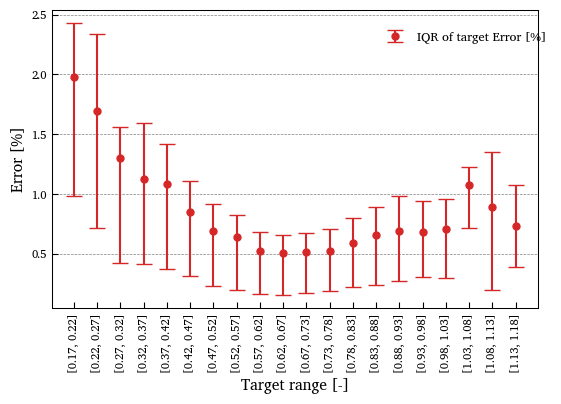

In [38]:
fig, ax1 = plt.subplots(figsize=plot_params.get_figsize(1.0))

counts, bins = np.histogram(y_true, bins=20)

for i in range(len(counts)):
    mask = np.logical_and(y_true >= bins[i], y_true < bins[i+1])

    error_bin = np.abs(relative_deviation)[mask]

    error_bin_mean = error_bin.mean()

    confidence = 50
    error_lower_val = np.percentile(error_bin, (100 - confidence) / 2)
    error_upper_val = np.percentile(error_bin, confidence + (100 - confidence) / 2)

    error_lower_bound = error_bin_mean - error_lower_val
    error_upper_bound = error_upper_val - error_bin_mean

    error_bounds = np.array([[error_lower_bound], [error_upper_bound]])

    if i==0:
        label1='IQR of target Error [%]'
    else:
        label1=None
    ax1.errorbar(i, error_bin_mean, yerr=error_bounds, fmt='o', color=plot_params.colors[3], markersize=5, capsize=6,
                 label=label1)

ax1.set_xlabel('Target range [-]')
ax1.set_ylabel('Error [%]')
ax1.set_xticks(np.arange(len(counts)))
ax1.set_xticklabels([f"[{bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(counts))],rotation=90)
ax1.legend(loc=[0.67, 0.87])
plt.grid(True, axis='y', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
plt.show()

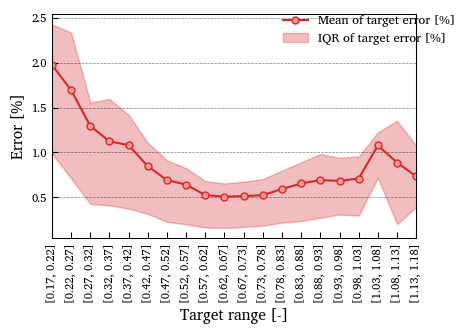

In [42]:
fig, ax1 = plt.subplots(figsize=plot_params.get_figsize(0.75))

counts, bins = np.histogram(y_true, bins=20)

x_vals = []
means = []
lowers = []
uppers = []

for i in range(len(counts)):
    mask = np.logical_and(y_true >= bins[i], y_true < bins[i+1])
    error_bin = np.abs(relative_deviation)[mask]
    if len(error_bin) == 0:
        continue
    error_bin_mean = error_bin.mean()
    confidence = 50
    error_lower_val = np.percentile(error_bin, (100 - confidence) / 2)
    error_upper_val = np.percentile(error_bin, confidence + (100 - confidence) / 2)
    error_lower_bound = error_bin_mean - error_lower_val
    error_upper_bound = error_upper_val - error_bin_mean

    x_vals.append(i)
    means.append(error_bin_mean)
    lowers.append(error_bin_mean - error_lower_bound)
    uppers.append(error_bin_mean + error_upper_bound)

ax1.plot(x_vals, means, 
         color=plot_params.colors[3],
         markerfacecolor=plot_params.morecolors[7], 
         markeredgecolor=plot_params.morecolors[6], 
         marker='o', markersize=5, label='Mean of target error [%]')
ax1.fill_between(x_vals, lowers, uppers, color=plot_params.colors[3], alpha=0.3, label='IQR of target error [%]')

ax1.set_xlabel('Target range [-]')
ax1.set_ylabel('Error [%]')
ax1.set_xticks(np.arange(len(counts)))
ax1.set_xticklabels([f"[{bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(counts))], rotation=90)
ax1.legend(loc=[0.62, 0.84])
plt.xlim([min(x_vals), max(x_vals)])
plt.grid(True, axis='y', 
         color='k', 
         linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)

if plot_params.save_figures:
    plt.savefig(r'Plots\DNN_Error.svg', format='svg')

plt.show()


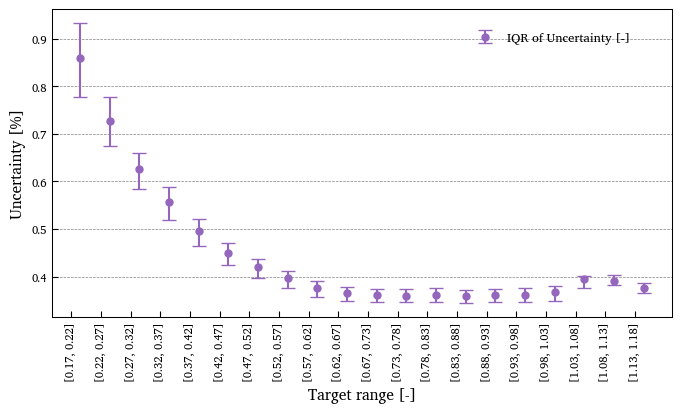

In [43]:
fig, ax1 = plt.subplots(figsize=(8,4))

counts, bins = np.histogram(y_true, bins=20)

for i in range(len(counts)):
    mask = np.logical_and(y_true >= bins[i], y_true < bins[i+1])

    uncertainty_bin = uncertainty[mask]

    uncertainty_bin_mean = uncertainty_bin.mean()

    confidence = 50
    uncertainty_lower_val = np.percentile(uncertainty_bin, (100 - confidence) / 2)
    uncertainty_upper_val = np.percentile(uncertainty_bin, confidence + (100 - confidence) / 2)

    uncertainty_lower_bound = uncertainty_bin_mean - uncertainty_lower_val
    uncertainty_upper_bound = uncertainty_upper_val - uncertainty_bin_mean

    uncertainty_bounds = np.array([[uncertainty_lower_bound], [uncertainty_upper_bound]])

    if i==0:
        label1='Error [%]'
        label2='IQR of Uncertainty [-]'
    else:
        label1=None
        label2=None
    ax1.errorbar(i+0.3, uncertainty_bin_mean, yerr=uncertainty_bounds, fmt='o', color=plot_params.colors[4], markersize=5, capsize=5,
                 label=label2)

ax1.set_xlabel('Target range [-]')
ax1.set_ylabel('Uncertainty [%]')
ax1.set_xticks(np.arange(len(counts)))
ax1.set_xticklabels([f"[{bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(counts))],rotation=90)
ax1.legend(loc=[0.67, 0.87])
plt.grid(True, axis='y', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)

plt.show()

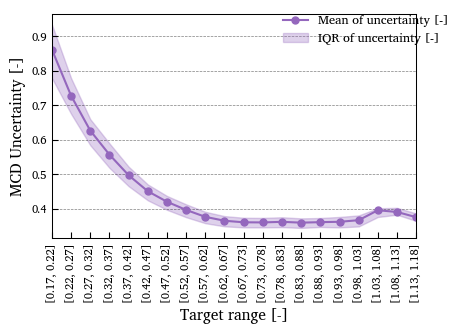

In [44]:
fig, ax1 = plt.subplots(figsize=plot_params.get_figsize(0.75))

counts, bins = np.histogram(y_true, bins=20)

x_vals = []
means = []
lowers = []
uppers = []

for i in range(len(counts)):
    mask = np.logical_and(y_true >= bins[i], y_true < bins[i+1])
    error_bin = np.abs(uncertainty)[mask]
    if len(error_bin) == 0:
        continue
    error_bin_mean = error_bin.mean()
    confidence = 50
    error_lower_val = np.percentile(error_bin, (100 - confidence) / 2)
    error_upper_val = np.percentile(error_bin, confidence + (100 - confidence) / 2)
    error_lower_bound = error_bin_mean - error_lower_val
    error_upper_bound = error_upper_val - error_bin_mean

    x_vals.append(i)
    means.append(error_bin_mean)
    lowers.append(error_bin_mean - error_lower_bound)
    uppers.append(error_bin_mean + error_upper_bound)

ax1.plot(x_vals, means, color=plot_params.colors[4], marker='o', markersize=5, label='Mean of uncertainty [-]')
ax1.fill_between(x_vals, lowers, uppers, color=plot_params.colors[4], alpha=0.3, label='IQR of uncertainty [-]')

ax1.set_xlabel('Target range [-]')
ax1.set_ylabel('MCD Uncertainty [-]')
ax1.set_xticks(np.arange(len(counts)))
ax1.set_xticklabels([f"[{bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(counts))], rotation=90)
ax1.legend(loc=[0.62, 0.84])
plt.xlim([min(x_vals), max(x_vals)])
plt.grid(True, axis='y', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
plt.show()

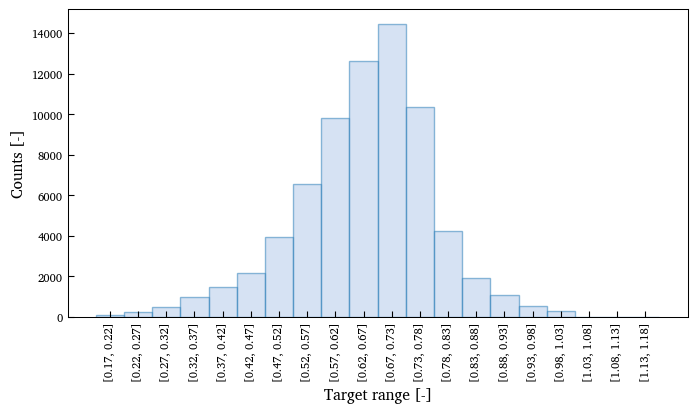

In [45]:
fig, ax1 = plt.subplots(figsize=(8,4))

counts, bins = np.histogram(y_true, bins=20)
bins_mid = bins[:-1] + (bins[1]-bins[0])/2

plt.hist(y_true, bins=20, alpha=0.5, 
         color=plot_params.morecolors[1], 
         edgecolor=plot_params.morecolors[0],
         linewidth=1.0,
         label='Data points')

plt.ylabel('Counts [-]')
plt.xlabel('Target range [-]')
plt.xticks(bins_mid,[f"[{bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(counts))],rotation=90)
plt.show()

The larger error and uncertainty for _small_ predicted targets can partly be explained by _sparsity_ of the training data for these values. However, looking at the graph below, the predictions for _large_ targets also have _sparse_ training data but seem to be much more _reliable_.

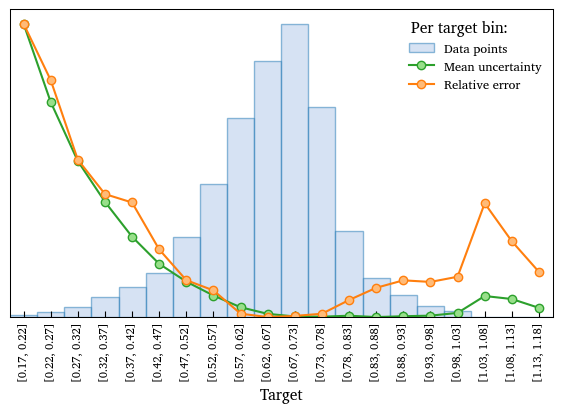

In [46]:
fig, ax = plt.subplots(figsize=(7,4))   

plt.hist(y_true, bins=20, alpha=0.5, 
         color=plot_params.morecolors[1], 
         edgecolor=plot_params.morecolors[0],
         linewidth=1.0,
         label='Data points')

counts, bins = np.histogram(y_true, bins=20)
bins_mid = bins[:-1] + (bins[1]-bins[0])/2

uncertainty_means = []
for i in range(len(counts)):
    mask = np.logical_and(y_true >= bins[i], y_true < bins[i+1])
    uncertainty_bin = uncertainty[mask]
    uncertainty_bin_mean = uncertainty_bin.mean()
    uncertainty_means.append(uncertainty_bin_mean)
uncertainty_means = (np.array(uncertainty_means)-np.min(uncertainty_means)) / (np.max(uncertainty_means)-np.min(uncertainty_means)) * counts.max()

plt.plot(bins_mid,uncertainty_means,
         marker='o',
         markerfacecolor=plot_params.morecolors[5],
         markeredgecolor=plot_params.morecolors[4],
         color=plot_params.morecolors[4], 
         label='Mean uncertainty')

error_means = []
for i in range(len(counts)):
    mask = np.logical_and(y_true >= bins[i], y_true < bins[i+1])
    error_bin = np.abs(relative_deviation)[mask]
    error_bin_mean = error_bin.mean()
    error_means.append(error_bin_mean)
error_means = (np.array(error_means)-np.min(error_means)) / (np.max(error_means)-np.min(error_means)) * counts.max()
plt.plot(bins_mid,error_means,
         marker='o',
         markerfacecolor=plot_params.morecolors[3],
         markeredgecolor=plot_params.morecolors[2],
         color=plot_params.morecolors[2], 
         label='Relative error')

plt.legend(title='Per target bin:       ')
plt.xlim([min(y_true),max(y_true)])
plt.yticks([])
plt.ylabel('')

plt.xlabel('Target')
plt.xticks(bins_mid,[f"[{bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(counts))],rotation=90)
plt.show()

**Effect of data sparsity on error & uncertainty**

For each target bin, get the amount of data and the mean error & uncertainty.

In [49]:
df_test = df_full.loc[model.data['test_data']]

In [50]:
n_bins = 50
target_true_counts, target_true_bins = np.histogram(y_true,bins=n_bins)
target_true_bins_mid = target_true_bins[:-1] + np.diff(target_true_bins) / 2

uncertainty_counts, uncertainty_bins = np.histogram(uncertainty,bins=n_bins)

uncertainty_bins_means = np.zeros(len(target_true_bins)-1)
uncertainty_bins_var = np.zeros(len(target_true_bins)-1)

features_bin = {feature: np.zeros(len(target_true_bins)-1) for feature in model.features}

for i in range(len(uncertainty_counts)):
    mask = (y_true >= target_true_bins[i]) & (y_true < target_true_bins[i+1])
    uncertainty_bins_means[i] = np.mean(uncertainty[mask])
    uncertainty_bins_var[i] = np.var(uncertainty[mask])

    for feature in model.features:
        features_bin[feature][i] = np.mean(df_test.loc[mask, feature])

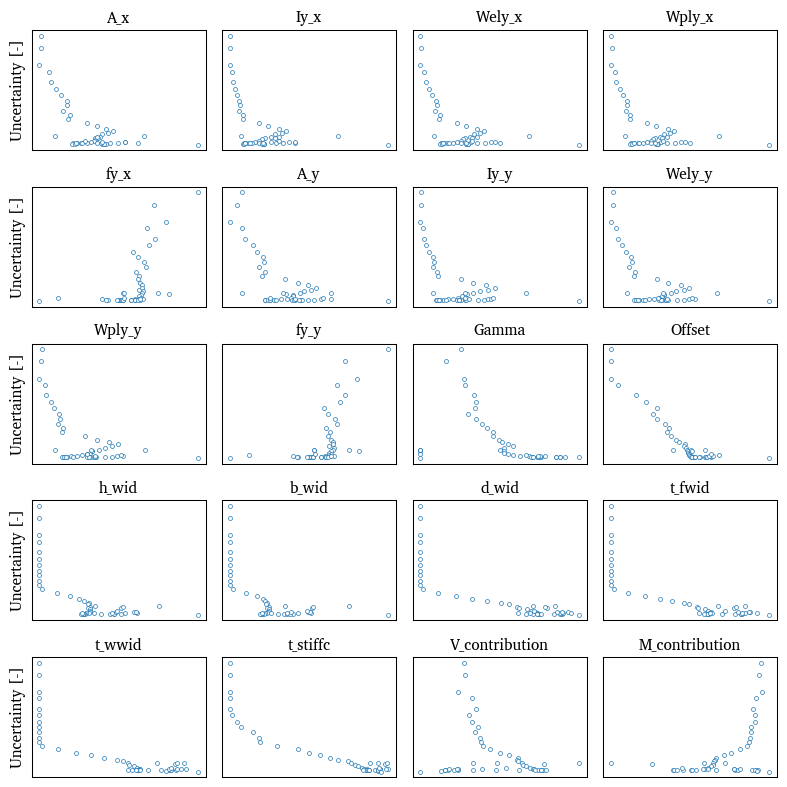

In [52]:
fig, axs = plt.subplots(int(len(model.features)/4),4, figsize=(8,8), sharey=True)

for i, feature in enumerate(model.features):
    ax = axs[int(i/4), i%4]
    ax.scatter(features_bin[feature], uncertainty_bins_means, 
               s=8, 
               edgecolor=plot_params.morecolors[0],
               linewidth=0.5,
               facecolor='white')
    ax.set_title(feature)
    ax.set_xticks([])
    ax.set_yticks([])

for i in range(4):
    axs[i,0].set_ylabel('Uncertainty [-]')

plt.tight_layout()
plt.show()

Bin the **true targets** and find for each bin the number of elements per bin ($N_{\text{bin}}$). For all elements in a **bin** find the **mean** of its **uncertainty** ($\mu_{\text{uncertainty,bin}}$). Then try to find a visual correlation between $\mu_{\text{uncertainty,bin}}$ and $N_{\text{bin}}$. The goal is to understand if uncertainty of a given predicted target range (=bin), correlates to the number of samples available. It would be common sense to see bins with few samples $N_{\text{bin}}$ to have larger uncertainty $\mu_{\text{uncertainty,bin}}$.

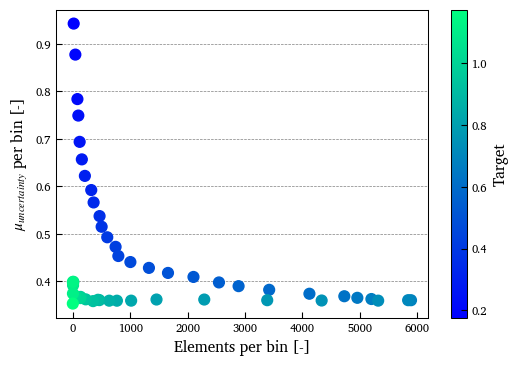

In [53]:
fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(target_true_counts,uncertainty_bins_means,
            s=60, 
            c=target_true_bins_mid,
            cmap='winter',
            zorder=2)
plt.ylabel("$\mu_{uncertainty}$ per bin [-]")
plt.xlabel("Elements per bin [-]")

plt.colorbar(label='Target')

plt.grid(True, axis='y', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)

plt.show()

As indicated there is a strong relation between $\mu_{\text{uncertainty,bin}}$ and $N_\text{bin}$. Bins with few elements either tend to have a very small **OR** large uncertainty. This depends on the target of the bin. It can be said that:

- Bins with **few** values and a **small** true target, have a small uncertainty $\mu_{\text{uncertainty,bin}}$

- Bins with **few** values and a **large** true target, have a large uncertainty $\mu_{\text{uncertainty,bin}}$


Few samples lead to larger variation, hence larger uncertainty. But how does the target decides on wheter the uncertainty is high or low?

There is no linear relation between the **true target** and the **uncertainty**, but there is a tendency for a **large** true target to be **more** **uncertain**.

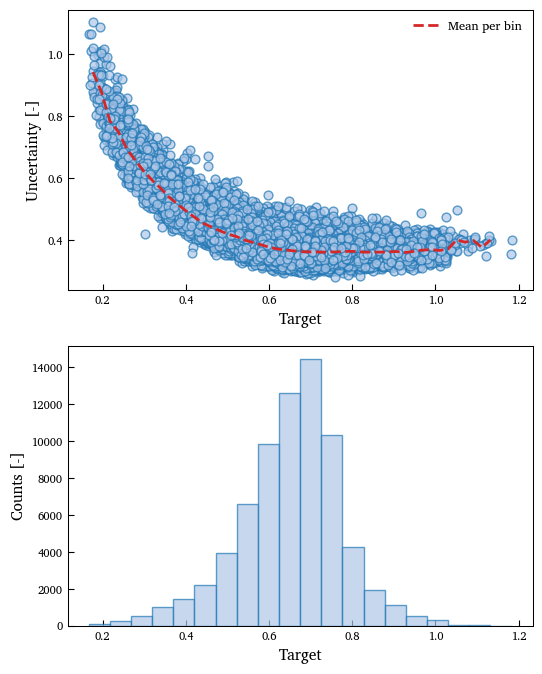

In [54]:
fig, axs = plt.subplots(2,1, figsize=(6, 8))

axs[0].scatter(y_true, uncertainty, 
               s=40, facecolor=plot_params.morecolors[1],
                edgecolors=plot_params.morecolors[0],
                linewidth=1.0, alpha=0.7, zorder=2)

axs[0].plot(target_true_bins_mid,uncertainty_bins_means,
            c=plot_params.colors[3],
            linewidth=2.0,
            linestyle='--',
            label='Mean per bin'
            )

axs[1].hist(y_true, facecolor=plot_params.morecolors[1],
               edgecolor=plot_params.morecolors[0], 
               linewidth=1.0, 
               alpha=0.7, zorder=2, 
               bins=20, 
               label='True Target')

axs[0].set_xlabel("Target")
axs[0].set_ylabel("Uncertainty [-]")

axs[1].set_xlabel("Target")
axs[1].set_ylabel("Counts [-]")

axs[0].legend()

plt.show()

#### MC Mean, Standard Deviation, Variance

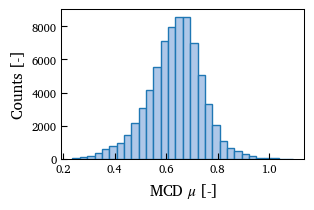

In [55]:
fig, ax = plt.subplots(figsize=plot_params.get_figsize(0.5))

_ = plt.hist(mcd_mean, 
             bins=30, 
             facecolor=plot_params.morecolors[1],
             edgecolor=plot_params.morecolors[0])
plt.xlabel(r'MCD $\mu$ [-]')
plt.ylabel('Counts [-]')

if plot_params.save_figures:
    plt.savefig(r'Plots\UNC_mean.svg', format='svg')

plt.show()

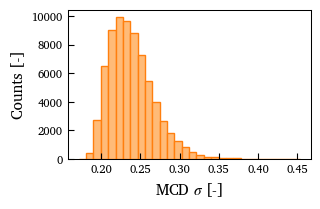

In [56]:
fig, ax = plt.subplots(figsize=plot_params.get_figsize(0.5))

_ = plt.hist(mcd_std, 
             bins=30, 
             facecolor=plot_params.morecolors[3],
             edgecolor=plot_params.morecolors[2])
plt.xlabel(r'MCD $\sigma$ [-]')
plt.ylabel('Counts [-]')

if plot_params.save_figures:
    plt.savefig(r'Plots\UNC_sigma.svg', format='svg')

plt.show()

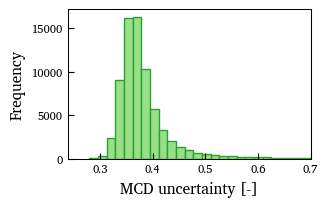

In [57]:
fig, ax = plt.subplots(figsize=plot_params.get_figsize(0.5))

_ = plt.hist(uncertainty, 
             bins=50, 
             facecolor=plot_params.morecolors[5],
             edgecolor=plot_params.morecolors[4])
plt.xlabel('MCD uncertainty [-]')
plt.ylabel('Frequency')
plt.xlim([None,0.7])

if plot_params.save_figures:
    plt.savefig(r'Plots\UNC_uncertainty.svg', format='svg')

plt.show()

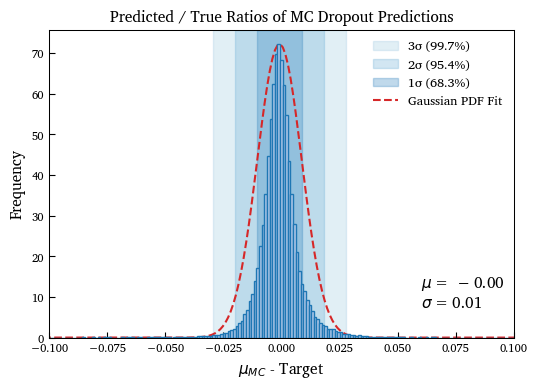

In [69]:
fig, ax = plt.subplots(figsize=(6,4))

counts, bins, _ = plt.hist(
    relative_error.flatten(), bins=1000, density=True, 
    facecolor=plot_params.morecolors[1], edgecolor=plot_params.morecolors[0], alpha=1.0, zorder=2
)

mu, sigma = np.mean(relative_error.flatten()), np.std(relative_error.flatten())
x = np.linspace(min(relative_error.flatten()), max(relative_error.flatten()), 1000)
gaussian_curve = norm.pdf(x, mu, sigma)

gaussian_curve *= max(counts) / max(gaussian_curve)

ymin, ymax = 0, max(counts) * 1.1
ax.axvspan(mu - 3*sigma, mu + 3*sigma, alpha=0.3, color=plt.cm.tab20c.colors[2], label='3σ (99.7%)', zorder=0)
ax.axvspan(mu - 2*sigma, mu + 2*sigma, alpha=0.3, color=plt.cm.tab20c.colors[1], label='2σ (95.4%)', zorder=0)
ax.axvspan(mu - 1*sigma, mu + 1*sigma, alpha=0.3, color=plt.cm.tab20c.colors[0], label='1σ (68.3%)', zorder=0)

plt.xlim([-0.1,0.1])

plt.plot(x, gaussian_curve, c=plot_params.colors[3], 
         linewidth=1.5, 
         linestyle='--',
         label='Gaussian PDF Fit',
         zorder=1)

plt.xlabel('$\mu_{MC}$ - Target')
plt.ylabel('Frequency')
plt.title('Predicted / True Ratios of MC Dropout Predictions')

plt.annotate('$\mu= {:.2f}$\n$\sigma= {:.2f}$'.format(mu, sigma), 
             xy=(0.8, 0.1), xycoords='axes fraction')

plt.legend()
plt.show()

Each _violon_ represents the distribution of the target predictions of the test set of one MC dropout sample.

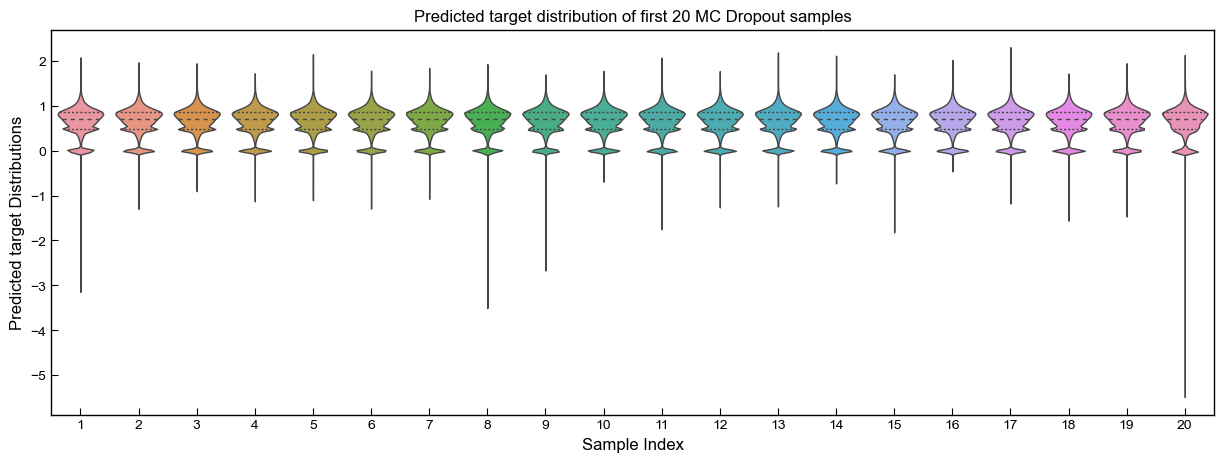

In [ ]:
m = 20  
subset_predictions = preds_mc_dropout[:m]
data = [subset_predictions[i] for i in range(m)]

plt.figure(figsize=(15, 5))
sns.violinplot(data=data, inner="quartile", linewidth=1)

plt.xlabel("Sample Index")
plt.ylabel("Predicted target Distributions")
plt.title(f"Predicted target distribution of first {m} MC Dropout samples")

plt.xticks(ticks=range(m), labels=[f"{i+1}" for i in range(m)])

plt.show()

### Analysis of Uncertainty

Try to identify correlations between features and other metrics to the predicted uncertainty. 

#### Visual Inspection

AttributeError: 'Plotting_Parameters' object has no attribute 'feature_names'

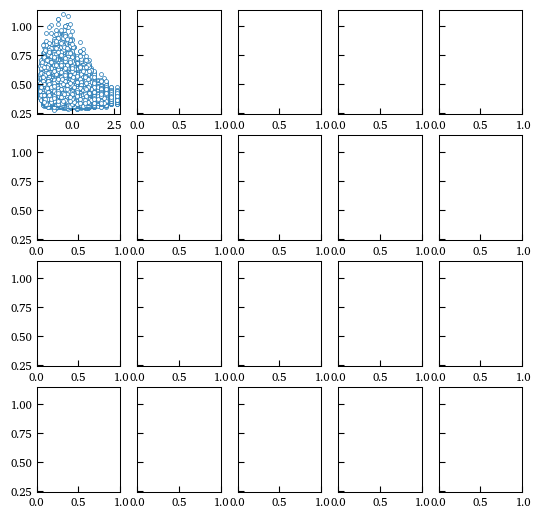

In [61]:
fig, axs = plt.subplots(int(len(model.features)/5),5, figsize=plot_params.get_figsize(1.0,1.0), sharey=True)

for i, feature in enumerate(model.features):
    ax = axs[int(i/5), i%5]
    ax.scatter(model.x_test[:,i], uncertainty, 
               s=8, 
               edgecolor=plot_params.morecolors[0],
               linewidth=0.5,
               facecolor='white')
    ax.set_xlabel(plot_params.feature_names[feature])
    ax.set_xticks([])
    ax.set_yticks([])

    if i % 5 == 0:
        ax.set_ylabel('Uncertainty [-]')

if plot_params.save_figures:
    plt.savefig(r'Plots\UNC_Relations.svg', format='svg')

plt.tight_layout()
plt.show()

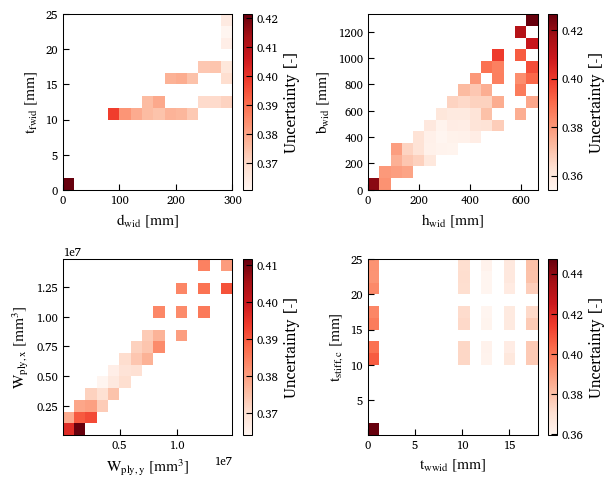

In [ ]:
x_test = model.x_test.numpy()
x_test = model.scaler_x.inverse_transform(x_test)
features = model.features

grid_x, grid_y = 15, 15

fig, axs = plt.subplots(2, 2, figsize=plot_params.get_figsize(1.0,0.8))

for i,(x_feature,y_feature) in enumerate(zip(['d_wid','h_wid','Wply_y','t_wwid'],['t_fwid','b_wid','Wply_x','t_stiffc'])):
    
    x_index = features.index(x_feature)
    y_index = features.index(y_feature)

    x = x_test[:, x_index]
    y = x_test[:, y_index]
    c = uncertainty.flatten()

    stat, x_edges, y_edges, _ = binned_statistic_2d(
        x, y, c, statistic='mean', bins=[grid_x, grid_y]
    )

    X, Y = np.meshgrid((x_edges[:-1] + x_edges[1:]) / 2, 
                    (y_edges[:-1] + y_edges[1:]) / 2)

    pcm = axs[int(i/2),i%2].pcolormesh(X, Y, stat.T, cmap='Reds', shading='auto')

    fig.colorbar(pcm, ax=axs[int(i/2),i%2], label="Uncertainty [-]")

    axs[int(i/2),i%2].set_xlabel(plot_params.feature_labels[x_feature])
    axs[int(i/2),i%2].set_ylabel(plot_params.feature_labels[y_feature])

plt.tight_layout()

if plot_params.save_figures:
    plt.savefig(r'Plots\UNC_masks.svg', format='svg')

plt.show()

#### Correlation Metrics

Calculate correlation metrics between **model features** and **uncertainty**.

In [150]:
def get_correlation_values(X, features, uncertainty):
    results = []
    
    for i, feature in enumerate(features):
        feature_values = X[:, i]

        pearson_corr, p_value = stats.pearsonr(feature_values, uncertainty)
        
        # 1. Spearman Rank Correlation
        spearman_corr, spearman_pval = stats.spearmanr(feature_values, uncertainty, nan_policy='omit')
        
        # 2. Mutual Information
        try:
            # Reshape for sklearn's API
            mi = mutual_info_regression(feature_values.reshape(-1, 1), uncertainty)[0]
        except:
            mi = np.nan
        
        # 3. Kendall's Tau (another rank correlation)
        kendall_tau, kendall_pval = stats.kendalltau(feature_values, uncertainty, nan_policy='omit')
        
        results.append({
            'Feature': feature,
            'Pearson Correlation': pearson_corr,
            'Pearson p-value': p_value,
            'Spearman Correlation': spearman_corr,
            'Spearman p-value': spearman_pval,
            'Kendall Tau': kendall_tau,
            'Kendall p-value': kendall_pval,
            'Mutual Information': mi
        })
    
    # Convert to DataFrame and sort by most significant metrics
    result_df = pd.DataFrame(results)
    return result_df

# Use the function
df_corr_metrics = get_correlation_values(model.x_test.numpy(), 
                                         model.features, 
                                         uncertainty.flatten())

df_corr_metrics

,Feature,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Kendall Tau,Kendall p-value,Mutual Information
0,A_x,0.217225,0.000000e+00,0.202680,0.000000e+00,0.140687,0.000000e+00,0.074811
1,Iy_x,0.241134,0.000000e+00,0.215112,0.000000e+00,0.148881,0.000000e+00,0.073322
2,Wely_x,0.239666,0.000000e+00,0.211071,0.000000e+00,0.146380,0.000000e+00,0.072107
3,Wply_x,0.239601,0.000000e+00,0.211005,0.000000e+00,0.146163,0.000000e+00,0.072667
4,fy_x,-0.028368,3.363925e-14,-0.041214,3.053272e-28,-0.030722,3.182009e-28,0.005779
5,A_y,0.229170,0.000000e+00,0.216636,0.000000e+00,0.150185,0.000000e+00,0.086351
6,Iy_y,0.228668,0.000000e+00,0.215705,0.000000e+00,0.149017,0.000000e+00,0.083961
7,Wely_y,0.234221,0.000000e+00,0.213773,0.000000e+00,0.147901,0.000000e+00,0.085294
8,Wply_y,0.234361,0.000000e+00,0.217232,0.000000e+00,0.150282,0.000000e+00,0.087503
9,fy_y,-0.028368,3.363925e-14,-0.041214,3.053272e-28,-0.030722,3.182009e-28,0.005779


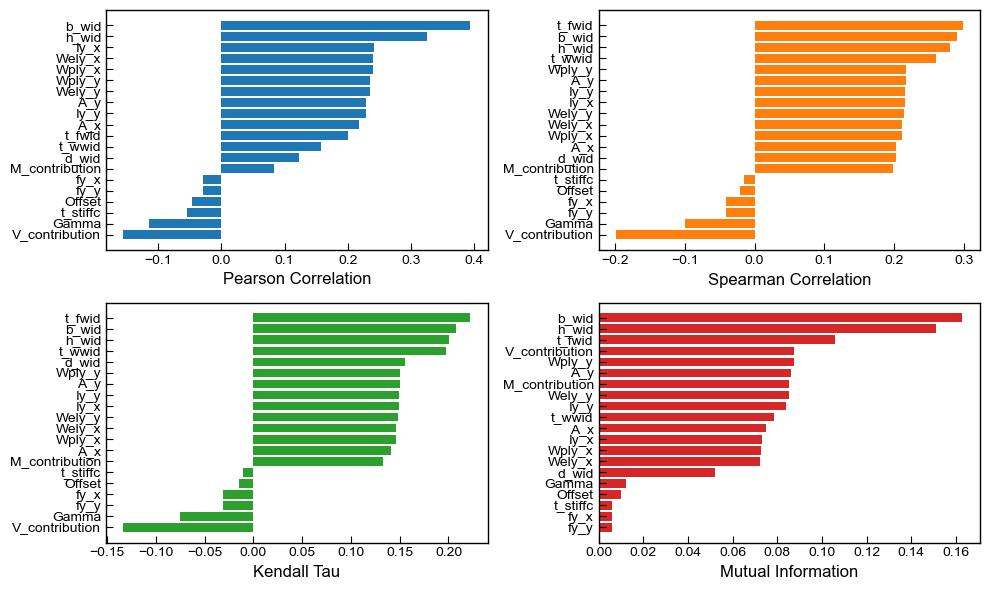

In [151]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Pearson Correlation
df_sorted_pearson = df_corr_metrics[['Feature', 'Pearson Correlation']].sort_values(by='Pearson Correlation', ascending=True)
axs[0,0].barh(df_sorted_pearson['Feature'], df_sorted_pearson['Pearson Correlation'], color=plot_params.colors[0])
axs[0,0].set_xlabel('Pearson Correlation')

# Spearman Correlation
df_sorted_spearman = df_corr_metrics[['Feature', 'Spearman Correlation']].sort_values(by='Spearman Correlation', ascending=True)
axs[0,1].barh(df_sorted_spearman['Feature'], df_sorted_spearman['Spearman Correlation'], color=plot_params.colors[1])
axs[0,1].set_xlabel('Spearman Correlation')

# Kendall Tau
df_sorted_kendall = df_corr_metrics[['Feature', 'Kendall Tau']].sort_values(by='Kendall Tau', ascending=True)
axs[1,0].barh(df_sorted_kendall['Feature'], df_sorted_kendall['Kendall Tau'], color=plot_params.colors[2])
axs[1,0].set_xlabel('Kendall Tau')

# Mutual Information
df_sorted_mutual_info = df_corr_metrics[['Feature', 'Mutual Information']].sort_values(by='Mutual Information', ascending=True)
axs[1,1].barh(df_sorted_mutual_info['Feature'], df_sorted_mutual_info['Mutual Information'], color=plot_params.colors[3])
axs[1,1].set_xlabel('Mutual Information')

# Adjust layout
plt.tight_layout()
plt.show()

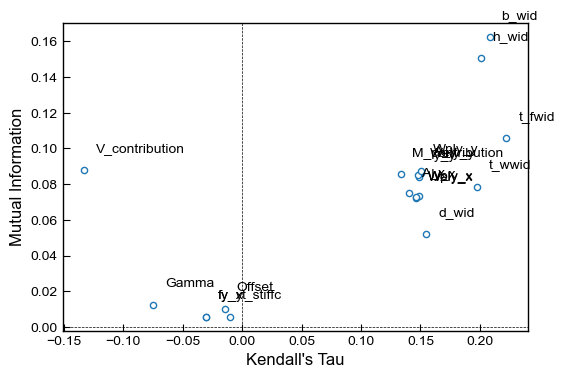

In [152]:
fig, ax = plt.subplots(figsize=(6,4))

plt.scatter(df_corr_metrics['Kendall Tau'], df_corr_metrics['Mutual Information'],
            s=20,
            edgecolor=plot_params.morecolors[0],
            linewidth=1.0,
            facecolor='white')

for i,row in df_corr_metrics.iterrows():
    plt.text(row['Kendall Tau']+0.01, row['Mutual Information']+0.01, row['Feature'], fontsize=10)

ax.axvline(0, color='k', linestyle='--', linewidth=0.5)
ax.axhline(0, color='k', linestyle='--', linewidth=0.5)

plt.xlabel("Kendall's Tau")
plt.ylabel("Mutual Information")

plt.show()

#### Feature Importance


Random Forest Feature Importances:
           Feature  Importance
18  V_contribution    0.212360
10           Gamma    0.138204
19  M_contribution    0.137344
13           b_wid    0.131643
0              A_x    0.044889
12           h_wid    0.032814
17        t_stiffc    0.031029
16          t_wwid    0.029133
14           d_wid    0.029079
3           Wply_x    0.027717
15          t_fwid    0.027165
6             Iy_y    0.025801
11          Offset    0.025562
1             Iy_x    0.021946
5              A_y    0.021542
7           Wely_y    0.019376
8           Wply_y    0.017927
2           Wely_x    0.014430
4             fy_x    0.006058
9             fy_y    0.005983


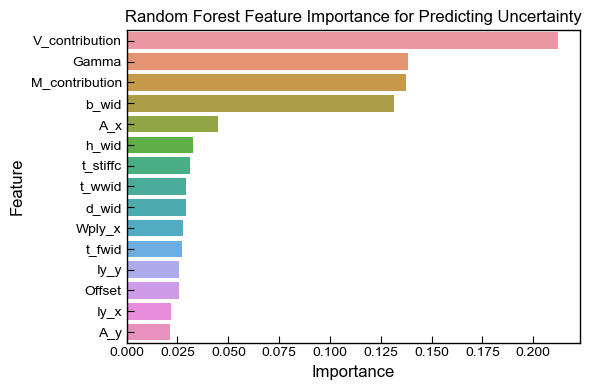

In [ ]:
# Ensure data is properly formatted
X = np.array(model.x_test, dtype=float)
y = np.array(uncertainty, dtype=float)

# Create and train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.DataFrame({
    'Feature': model.features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importances)

# Plot feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importances.head(15))
plt.title('Random Forest Feature Importance for Predicting Uncertainty')
plt.tight_layout()
plt.show()

### Training Loss

During training regularization is applied, whereas during validation not, hence the loss is not directly comparable.

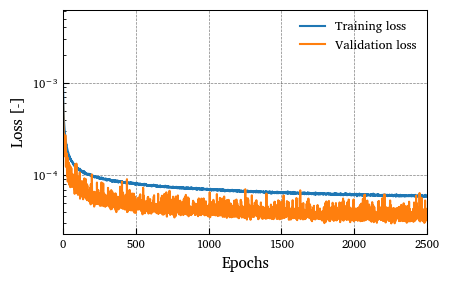

In [62]:
fig, ax = plt.subplots(figsize=plot_params.get_figsize(0.75))

plt.plot(model.train_losses['total'], label='Training loss', c=plot_params.colors[0])
plt.plot(model.val_losses['total'], label='Validation loss', c=plot_params.colors[1])
plt.plot

plt.xlabel('Epochs')
plt.ylabel('Loss [-]')

plt.yscale('log')

plt.grid(True, which='major', color='k', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlim([0,2500])
plt.yscale('log')
plt.legend()

if plot_params.save_figures:
    plt.savefig(r'Plots\DNN_Loss.svg', format='svg')

plt.show()

### Clustering

In [13]:
with open(r"Saved Variables\interaction_pca.pkl", "rb") as file:
    pca = pickle.load(file)

with open(r"Saved Variables\interaction_kmeans.pkl", "rb") as file:
    kmeans = pickle.load(file)

In [14]:
def normalize_curve(points):
    points = np.array(points)
    max_val = np.max(points) #max_vals = np.max(points, axis=0) (Both axes fixed on (1,0), (1,0)
    return points / max_val

def resample_curve(points, num_points=100):
    points = np.array(points)
    dist = np.cumsum(np.sqrt(np.sum(np.diff(points, axis=0)**2, axis=1)))
    dist = np.insert(dist, 0, 0)
    uniform_dist = np.linspace(0, dist[-1], num_points)
    interp_func = interp1d(dist, points, axis=0)
    return interp_func(uniform_dist)

def flatten_curve(points):
    return points.flatten()

def preprocess_curves(curves, num_points=100):
    return [flatten_curve(resample_curve(normalize_curve(c), num_points)) for c in curves]

def assign_new_data_to_clusters(new_curves, pca, kmeans):
    new_data = preprocess_curves(new_curves)
    reduced_new_data = pca.transform(new_data)
    cluster_labels = kmeans.predict(reduced_new_data)
    distances = np.min(kmeans.transform(reduced_new_data), axis=1)
    
    return cluster_labels, distances

In [15]:
def calculate_wonkyness(x_coords, y_coords):
    angles = []
    for i in range(len(x_coords) - 2):
        # Define the three consecutive points
        p1 = np.array([x_coords[i], y_coords[i]])
        p2 = np.array([x_coords[i+1], y_coords[i+1]])
        p3 = np.array([x_coords[i+2], y_coords[i+2]])

        # Vector of the first segment (p2 - p1)
        v1 = p2 - p1
        # Vector of the second segment (p3 - p2)
        v2 = p3 - p2

        # Calculate the angle between the two vectors using the dot product
        dot_product = np.dot(v1, v2)
        magn_v1 = np.linalg.norm(v1)
        magn_v2 = np.linalg.norm(v2)

        cos_theta = dot_product / (magn_v1 * magn_v2)
        # Ensure cos_theta is within the valid range [-1, 1] due to potential floating-point errors
        cos_theta = np.clip(cos_theta, -1.0, 1.0)
        angle = np.arccos(cos_theta)

        angles.append(angle)

    return np.std(angles)

In [16]:
df_test = df_full.loc[model.data['test_data']].copy()

In [17]:
relative_prediction_error = np.abs(y_pred - y_true) / (y_true)

In [18]:
interpretability_metrics = {'uncertainty': uncertainty.flatten(),
                            'relative_prediction_error': relative_prediction_error,
                            'cluster': np.zeros(len(df_test)),
                            'wonkyness': np.zeros(len(df_test)),
                            'cluster_distance': np.zeros(len(df_test))
                            }

In [ ]:
for i,(id,profile) in enumerate(df_test.iterrows()):
    if i % 100 == 0:
        print(f'{i/len(df_test):.2%}')
    M_Rd_pred, V_Rd_pred, _ = model.get_MV_interaction_prediction(profile,n_predictions=20)

    wonkyness = calculate_wonkyness(M_Rd_pred, V_Rd_pred)

    curve = np.array(list(zip(M_Rd_pred,
                            V_Rd_pred)))

    cluster, cluster_confidence = assign_new_data_to_clusters(np.array([curve]), pca, kmeans)

    interpretability_metrics['cluster'][i] = cluster[0]
    interpretability_metrics['wonkyness'][i] = wonkyness
    interpretability_metrics['cluster_distance'][i] = cluster_confidence[0]

0.00%
0.14%
0.28%
0.42%
0.56%
0.70%
0.84%
0.98%
1.12%
1.26%
1.40%
1.54%
1.68%
1.82%
1.96%
2.10%
2.24%
2.38%
2.52%
2.66%
2.80%
2.94%
3.08%
3.22%
3.36%
3.50%
3.64%
3.78%
3.92%
4.06%
4.20%
4.34%
4.48%
4.62%
4.76%
4.90%
5.04%
5.18%
5.32%
5.46%
5.60%
5.74%
5.88%
6.02%
6.16%
6.30%
6.44%
6.58%
6.72%
6.86%
7.00%
7.14%
7.28%
7.42%
7.56%
7.70%
7.84%
7.98%
8.12%
8.26%
8.40%
8.54%
8.68%
8.82%
8.96%
9.10%
9.24%
9.38%
9.52%
9.66%
9.80%
9.94%
10.08%
10.22%
10.36%
10.50%
10.64%
10.78%
10.92%
11.06%
11.20%
11.34%
11.48%
11.62%
11.76%
11.90%
12.04%
12.18%
12.32%
12.46%
12.60%
12.74%
12.88%
13.02%
13.16%
13.30%
13.44%
13.58%
13.72%
13.86%
14.00%
14.14%
14.28%
14.42%
14.56%
14.70%
14.84%
14.98%
15.12%
15.26%
15.40%
15.54%
15.68%
15.82%
15.96%
16.10%
16.24%
16.38%
16.52%
16.66%
16.80%
16.94%
17.08%
17.22%
17.36%
17.50%
17.64%
17.78%
17.92%
18.06%
18.20%
18.34%
18.48%
18.62%
18.76%
18.90%
19.04%
19.18%
19.32%
19.46%
19.60%
19.74%
19.88%
20.02%
20.16%
20.30%
20.44%
20.58%
20.72%
20.86%
21.00%
21.14%
21.28%
2

## MV Interaction Prediction

Visualize bad predictions and compare curves

In [63]:
def find_similar_profiles(x_profile,log=True):
    # Get the fixed features (all except M_contribution and V_contribution)
    fixed_features = [feat for feat in model.features if feat not in ['M_contribution', 'V_contribution']]
    
    # Create a hashable key from the fixed features of x_profile
    x_profile_key = tuple(x_profile[fixed_features].values.astype(np.float32))
    
    # Extract all profile data as a DataFrame for faster processing
    all_profiles_df = pd.DataFrame(model.x_data, columns=model.features)
    
    # Create mask for matching profiles
    mask = np.ones(len(all_profiles_df), dtype=bool)
    
    # Apply filter for each fixed feature
    for i, feature in enumerate(fixed_features):
        feature_idx = model.features.index(feature)
        mask &= (all_profiles_df.iloc[:, feature_idx] == x_profile_key[i])
    
    # Get indices of matching profiles
    profiles_similar = np.where(mask)[0].tolist()
    
    if log==True:
        print(f'{len(profiles_similar)} profiles found with the same fixed features')
    
    return profiles_similar

#### Plot Function

In [70]:
def plot_MV_interaction(x_profile,M_Rd_pred,V_Rd_pred,filename=None):
    profiles_similar = find_similar_profiles(x_profile)

    M_Rd_truth = df["M_Rd"].to_numpy()[profiles_similar]
    V_Rd_truth = df["V_Rd"].to_numpy()[profiles_similar]
    
    fig, ax = plt.subplots(figsize=(plot_params.get_figsize(1/2,aspect_ratio=1.0)))
    plt.plot(M_Rd_pred, V_Rd_pred, 
             marker='o',
             markersize=5,
             color = plot_params.morecolors[1],
             markerfacecolor=plot_params.morecolors[1],
             markeredgecolor=plot_params.morecolors[0],                    
             label="Predicted",
             zorder=2)

    plt.scatter(M_Rd_truth, V_Rd_truth,
                s=40, 
                color=plot_params.morecolors[7], 
                edgecolors=plot_params.morecolors[6],  
                linewidth=1,
                label="Data",
                zorder=2)

    ax.fill_between(M_Rd_pred, V_Rd_pred, color=plot_params.morecolors[1], alpha=0.2, zorder=1)

    plt.xlabel(plot_params.feature_labels["M_Rd"])
    plt.ylabel(plot_params.feature_labels["V_Rd"])
    plt.grid(True, which='major', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
    plt.xlim([0,None])
    plt.ylim([0,None])
    plt.legend()

    if plot_params.save_figures:
        plt.savefig(rf'Plots\{filename}.svg', format='svg')

    plt.show()

#### Plot single MV Interaction Curve

In [65]:
x_profile = df.iloc[100]

M_Rd_pred, V_Rd_pred, targets_predicted = model.get_MV_interaction_prediction(x_profile,n_predictions=20)
profiles_similar = find_similar_profiles(x_profile)

M_Rd_truth = df["M_Rd"].to_numpy()[profiles_similar]
V_Rd_truth = df["V_Rd"].to_numpy()[profiles_similar]

7 profiles found with the same fixed features


7 profiles found with the same fixed features


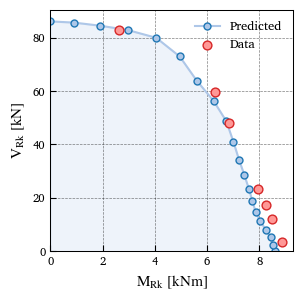

In [66]:
plot_MV_interaction(x_profile,M_Rd_pred,V_Rd_pred)

#### Plot worst MV interaction curves

In [67]:
relative_error = np.abs(y_pred-y_true) / y_true

In [68]:
y_pred_full, _ = model.predict(df_full)
y_true_full = df_full['target'].values
y_pred_full = y_pred_full.numpy().flatten()
relative_error_full = np.abs((y_pred_full - y_true_full)) / y_true_full

7 profiles found with the same fixed features


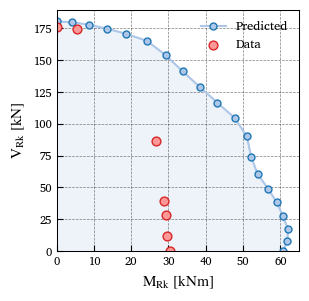

5 profiles found with the same fixed features


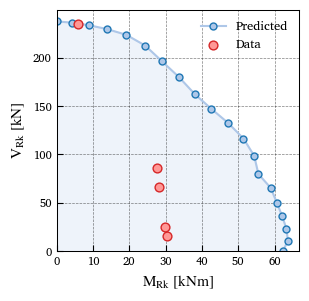

6 profiles found with the same fixed features


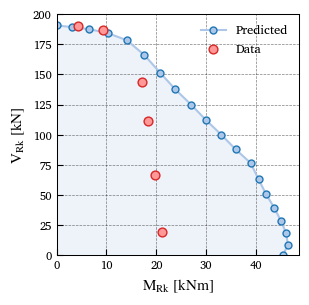

In [72]:
profiles_ids = np.argsort(relative_error_full.flatten())[-3:]
for profile_id in profiles_ids:
    x_profile = df.iloc[profile_id]
    M_Rd_pred, V_Rd_pred, targets_predicted = model.get_MV_interaction_prediction(x_profile,n_predictions=20)
    plot_MV_interaction(x_profile,M_Rd_pred,V_Rd_pred,filename=f'DNN_WorstCurves_{profile_id}')

#### Plot multiple MC interaction curves

4 profiles found with the same fixed features


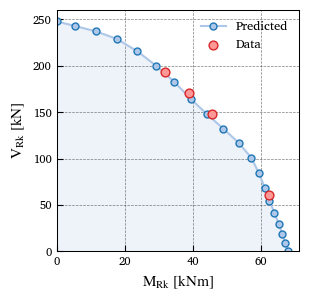

3 profiles found with the same fixed features


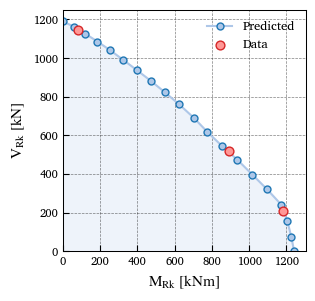

10 profiles found with the same fixed features


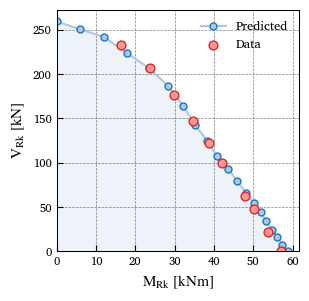

4 profiles found with the same fixed features


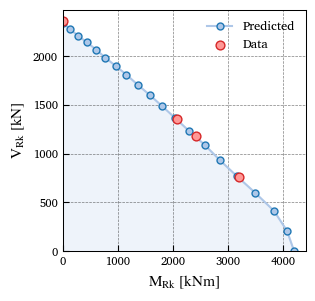

4 profiles found with the same fixed features


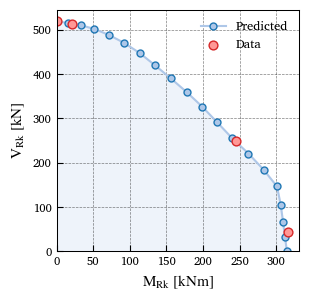

11 profiles found with the same fixed features


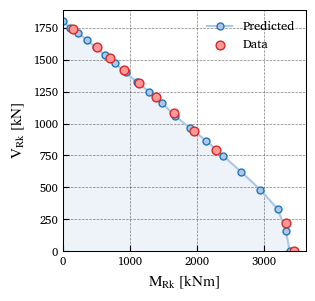

7 profiles found with the same fixed features


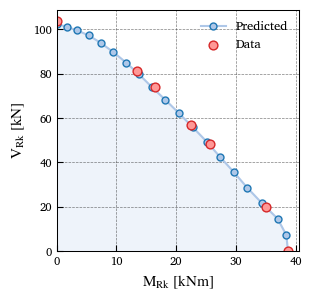

5 profiles found with the same fixed features


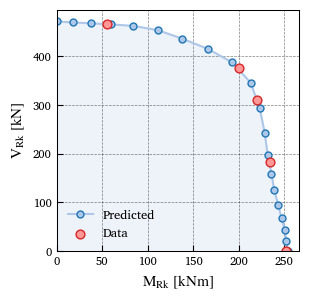

7 profiles found with the same fixed features


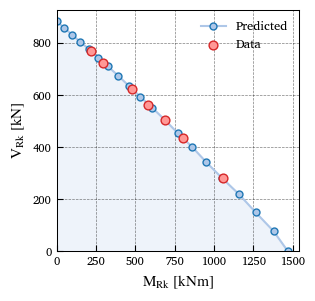

6 profiles found with the same fixed features


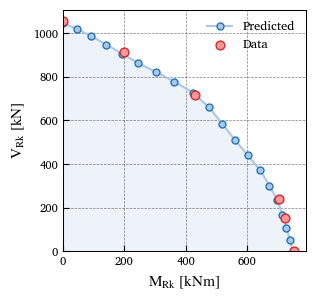

In [74]:
profiles_ids = np.random.randint(0, len(df), 10)
for profile_id in profiles_ids:
    x_profile = df.iloc[profile_id]
    M_Rd_pred, V_Rd_pred, targets_predicted = model.get_MV_interaction_prediction(x_profile,n_predictions=20)
    plot_MV_interaction(x_profile,M_Rd_pred,V_Rd_pred,filename=f'DNN_RandomCurves_{profile_id}')

## Measure M and V deviation

In [20]:
df_test = df_full.loc[model.data['test_data']].copy()

In [21]:
target_preds, _ = model.evaluate()
target_preds = target_preds.numpy().flatten()
target_truth = model.y_test.numpy().flatten()

In [22]:
Mpl_y = df_test['Mpl_y'].values
Vpl_y = df_test['Vpl_y'].values

M_cont = df_test['M_contribution'].values
V_cont = df_test['V_contribution'].values

M_Rd_pred = target_preds * Mpl_y * M_cont
V_Rd_pred = target_preds * Vpl_y * V_cont

M_Rd_truth = target_truth * Mpl_y * M_cont
V_Rd_truth = target_truth * Vpl_y * V_cont

M_Rd_error = M_Rd_pred - M_Rd_truth
M_Rd_rel_error = (M_Rd_pred - M_Rd_truth) / (M_Rd_truth+1e-4) * 100

V_Rd_error = V_Rd_pred - V_Rd_truth
V_Rd_rel_error = (V_Rd_pred - V_Rd_truth) / (V_Rd_truth+1e-4) * 100

target_error = target_preds - target_truth
target_rel_error = target_preds / target_truth

In [23]:
print(f'Largest relative error: {np.max(np.abs(target_rel_error)) * 100:.2f}%')
print(f'Corresponding MRd error: {M_Rd_error[np.argmax(np.abs(target_rel_error))]} kNm')
print(f'Corresponding VRd error: {V_Rd_error[np.argmax(np.abs(target_rel_error))]} kN')

Largest relative error: 199.88%
Corresponding MRd error: 30.323211118131876 kNm
Corresponding VRd error: 0.0 kN


In [24]:
error_distance = np.sqrt(M_Rd_error**2 + V_Rd_error**2)
length_predicted = np.sqrt(M_Rd_pred**2 + V_Rd_pred**2)
length_truth = np.sqrt(M_Rd_truth**2 + V_Rd_truth**2)
angle_predicted = np.arctan2(V_Rd_pred, M_Rd_pred)
angle_truth = np.arctan2(V_Rd_truth, M_Rd_truth)

In [25]:
def get_outlier(data,z_score=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - z_score * iqr
    upper_bound = q3 + z_score * iqr

    mask = (data >= lower_bound) & (data <= upper_bound)
    return mask

z_score = 15
filter_outlier_MRd = get_outlier(M_Rd_rel_error, z_score=z_score)
filter_outlier_VRd = get_outlier(V_Rd_rel_error, z_score=z_score)

filter_outlier = filter_outlier_MRd & filter_outlier_VRd

print(f"# Outliers with z_score = {z_score}: ", len(M_Rd_rel_error) - len(M_Rd_rel_error[filter_outlier]))

# Outliers with z_score = 15:  7


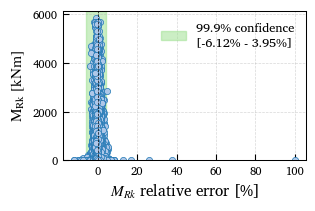

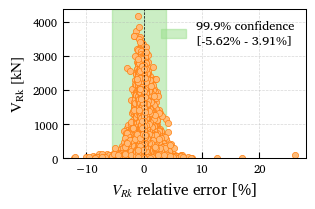

In [26]:
fig, ax = plt.subplots(figsize=plot_params.get_figsize(0.5))

confidence = 99.9
q_lower, q_upper = np.percentile(M_Rd_rel_error, [(100-confidence)/2, confidence-(100-confidence)/2])

plt.scatter(M_Rd_rel_error,
            M_Rd_truth,
            s=20,
            edgecolors=plot_params.morecolors[0],
            facecolor=plot_params.morecolors[1],
            linewidth=0.5,
            zorder=2
            )

ax.axvspan(q_lower, q_upper, alpha=0.5, color=plot_params.morecolors[5], 
           label=f"{confidence}% confidence\n[{q_lower:.2f}% - {q_upper:.2f}%]", zorder=1)

plt.axvline(0, color='k', linestyle='--', linewidth=0.5,zorder=4)

plt.xlabel("$M_{Rk}$ relative error [%]")
plt.ylabel(plot_params.feature_labels["M_Rd"])
plt.grid(True, linewidth=0.5, linestyle='--', alpha=0.5, zorder=0)
plt.ylim([0,None])
plt.legend()

if plot_params.save_figures:
     plt.savefig(rf'Plots\DNN_ErrorMRd.png', format='png')

plt.show()

fig, ax = plt.subplots(figsize=plot_params.get_figsize(0.5))

confidence = 99.9
q_lower, q_upper = np.percentile(V_Rd_rel_error, [(100-confidence)/2, confidence-(100-confidence)/2])

plt.scatter(V_Rd_rel_error,
            V_Rd_truth,
            s=20,
            edgecolors=plot_params.morecolors[2],
            facecolor=plot_params.morecolors[3],
            linewidth=0.5,
            zorder=2
            )

ax.axvspan(q_lower, q_upper, alpha=0.5, color=plot_params.morecolors[5], 
           label=f"{confidence}% confidence\n[{q_lower:.2f}% - {q_upper:.2f}%]", zorder=1)

plt.axvline(0, color='k', linestyle='--', linewidth=0.5, zorder=3)

plt.xlabel("$V_{Rk}$ relative error [%]")
plt.ylabel(plot_params.feature_labels["V_Rd"])
plt.grid(True, linewidth=0.5, linestyle='--', alpha=0.5, zorder=0)
plt.ylim([0,None])
plt.legend()

if plot_params.save_figures:
     plt.savefig(rf'Plots\DNN_ErrorVRd.png', format='png')

plt.show()

(-60.0, 60.0)

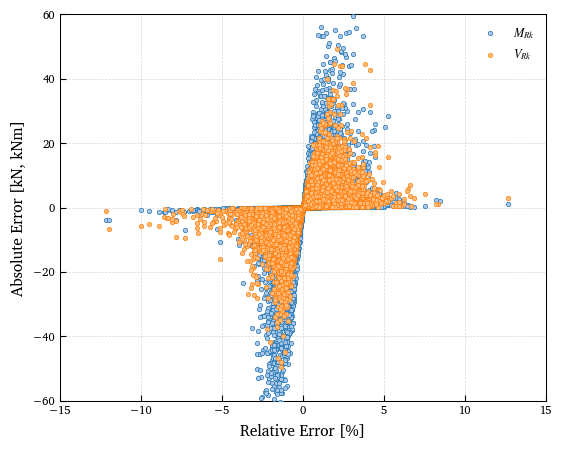

In [128]:
fig, ax = plt.subplots(figsize=plot_params.get_figsize(1.0, 0.8))

plt.scatter(M_Rd_rel_error, M_Rd_error,s=10,
            edgecolors=plot_params.morecolors[0],
            facecolor=plot_params.morecolors[1],
            linewidth=0.5,
            zorder=3,
            label=r'$M_{Rk}$')
plt.scatter(V_Rd_rel_error, V_Rd_error,s=10,
            edgecolors=plot_params.morecolors[2],
            facecolor=plot_params.morecolors[3],
            linewidth=0.5,
            zorder=3,
            label=r'$V_{Rk}$')

plt.xlabel('Relative Error [%]')
plt.ylabel('Absolute Error [kN, kNm]')
plt.grid(True, linewidth=0.5, linestyle='--', alpha=0.5, zorder=0)
plt.legend()
plt.xlim([-15,15])
plt.ylim([-60,60])

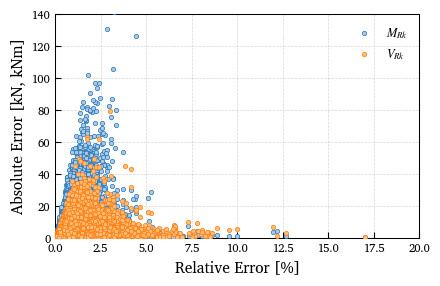

In [135]:
fig, ax = plt.subplots(figsize=plot_params.get_figsize(0.75))

plt.scatter(np.abs(M_Rd_rel_error), np.abs(M_Rd_error),s=10,
            edgecolors=plot_params.morecolors[0],
            facecolor=plot_params.morecolors[1],
            linewidth=0.5,
            zorder=3,
            label=r'$M_{Rk}$')
plt.scatter(np.abs(V_Rd_rel_error), np.abs(V_Rd_error),s=10,
            edgecolors=plot_params.morecolors[2],
            facecolor=plot_params.morecolors[3],
            linewidth=0.5,
            zorder=3,
            label=r'$V_{Rk}$')

plt.xlabel('Relative Error [%]')
plt.ylabel('Absolute Error [kN, kNm]')
plt.grid(True, linewidth=0.5, linestyle='--', alpha=0.5, zorder=0)
plt.legend()

plt.xlim([0,20])
plt.ylim([0,140])

if plot_params.save_figures:
     plt.savefig(rf'Plots\DNN_AbsAndRelError.svg', format='svg')

plt.show()

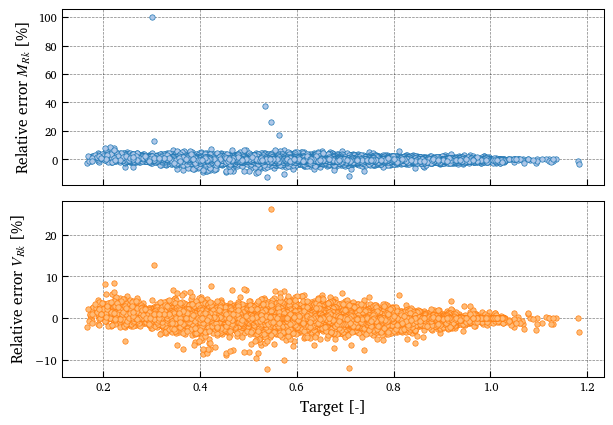

In [106]:
fig, axs = plt.subplots(2,1,figsize=plot_params.get_figsize(1.0,0.7), sharex=True)

axs[0].scatter(y_truth, M_Rd_rel_error,
               s=15, 
            facecolor=plot_params.morecolors[1], 
            edgecolors=plot_params.morecolors[0],
            linewidth=0.5,
            zorder=2)

axs[1].scatter(y_truth, V_Rd_rel_error,
               s=15, 
            facecolor=plot_params.morecolors[3], 
            edgecolors=plot_params.morecolors[2],
            linewidth=0.5,
            zorder=2)


axs[0].set_ylabel(r"Relative error $M_{Rk}$ [%]")
axs[1].set_ylabel(r"Relative error $V_{Rk}$ [%]")
axs[1].set_xlabel("Target [-]")

axs[0].grid(True, which='major', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
axs[1].grid(True, which='major', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)

plt.tight_layout()
plt.show()

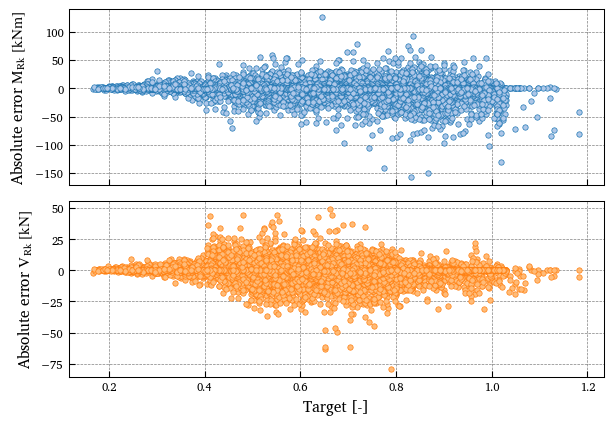

In [103]:
fig, axs = plt.subplots(2,1,figsize=plot_params.get_figsize(1.0,0.7), sharex=True)

axs[0].scatter(y_truth, M_Rd_error,
               s=15, 
            facecolor=plot_params.morecolors[1], 
            edgecolors=plot_params.morecolors[0],
            linewidth=0.5,
            zorder=2)

axs[1].scatter(y_truth, V_Rd_error,
               s=15, 
            facecolor=plot_params.morecolors[3], 
            edgecolors=plot_params.morecolors[2],
            linewidth=0.5,
            zorder=2)

axs[0].set_ylabel(f"Absolute error {plot_params.feature_labels['M_Rd']}")
axs[1].set_ylabel(f"Absolute error {plot_params.feature_labels['V_Rd']}")
axs[1].set_xlabel("Target [-]")

axs[0].grid(True, which='major', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
axs[1].grid(True, which='major', color='k', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)

plt.tight_layout()
plt.show()

With filtered outliers:

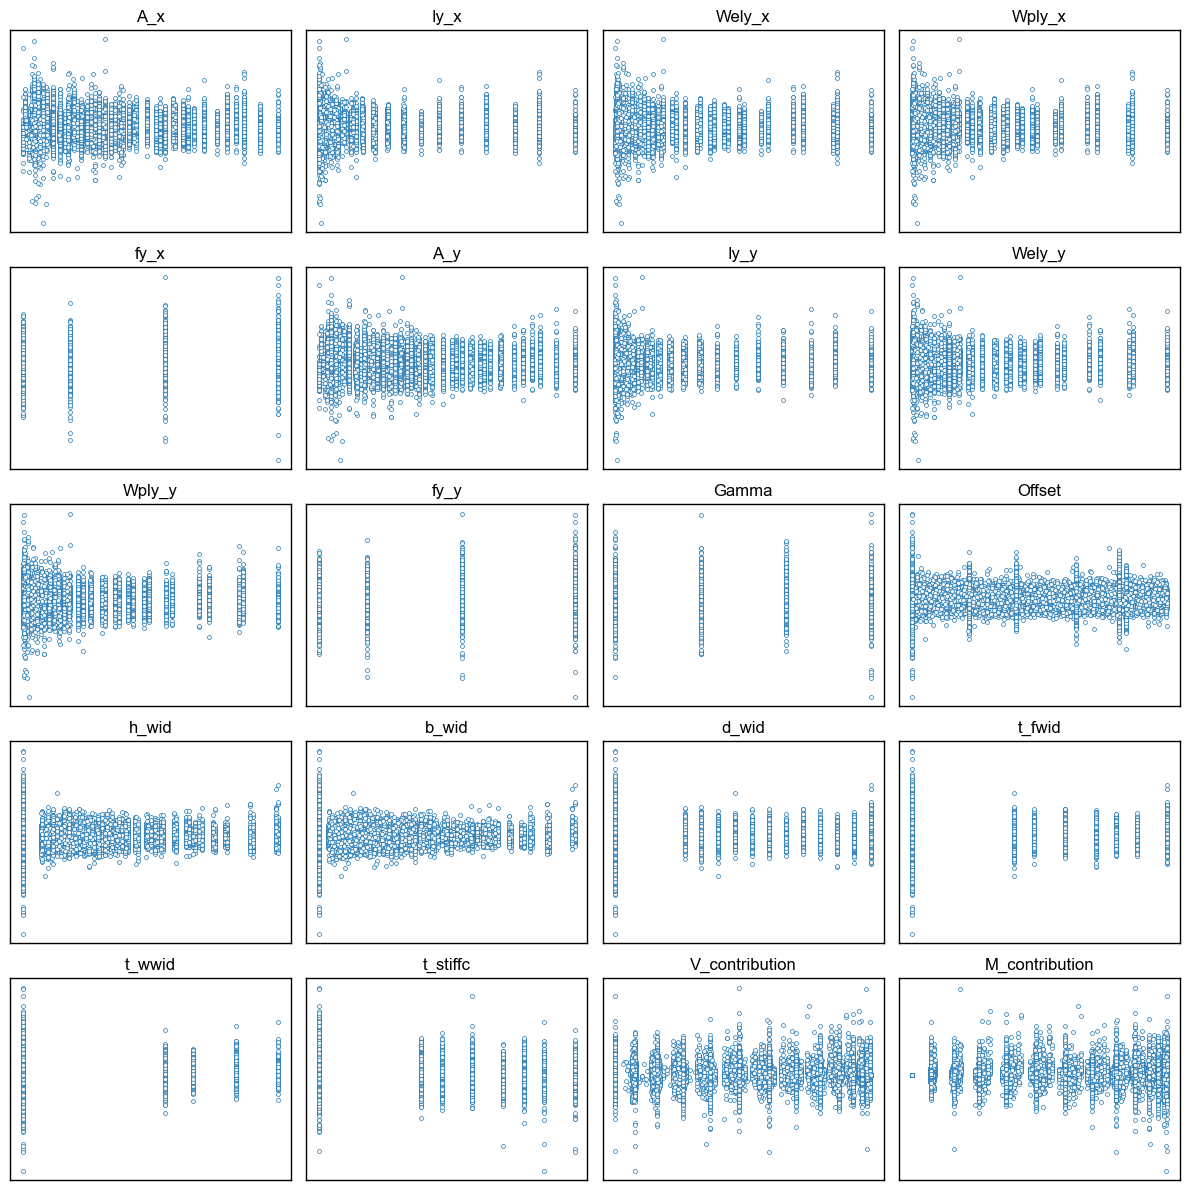

In [ ]:
fig, axs = plt.subplots(int(len(model.features)/4),4, figsize=(12,12), sharey=True)

for i, feature in enumerate(model.features):
    ax = axs[int(i/4), i%4]
    ax.scatter(df_test[feature][filter_outlier], M_Rd_rel_error[filter_outlier], 
               s=8, 
               edgecolor=plot_params.morecolors[0],
               linewidth=0.5,
               facecolor='white')
    ax.set_title(feature)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

#### Find Correlation from bad predictions with features

In [107]:
worst_predictions = np.argsort(relative_deviation.flatten())[-1000:]

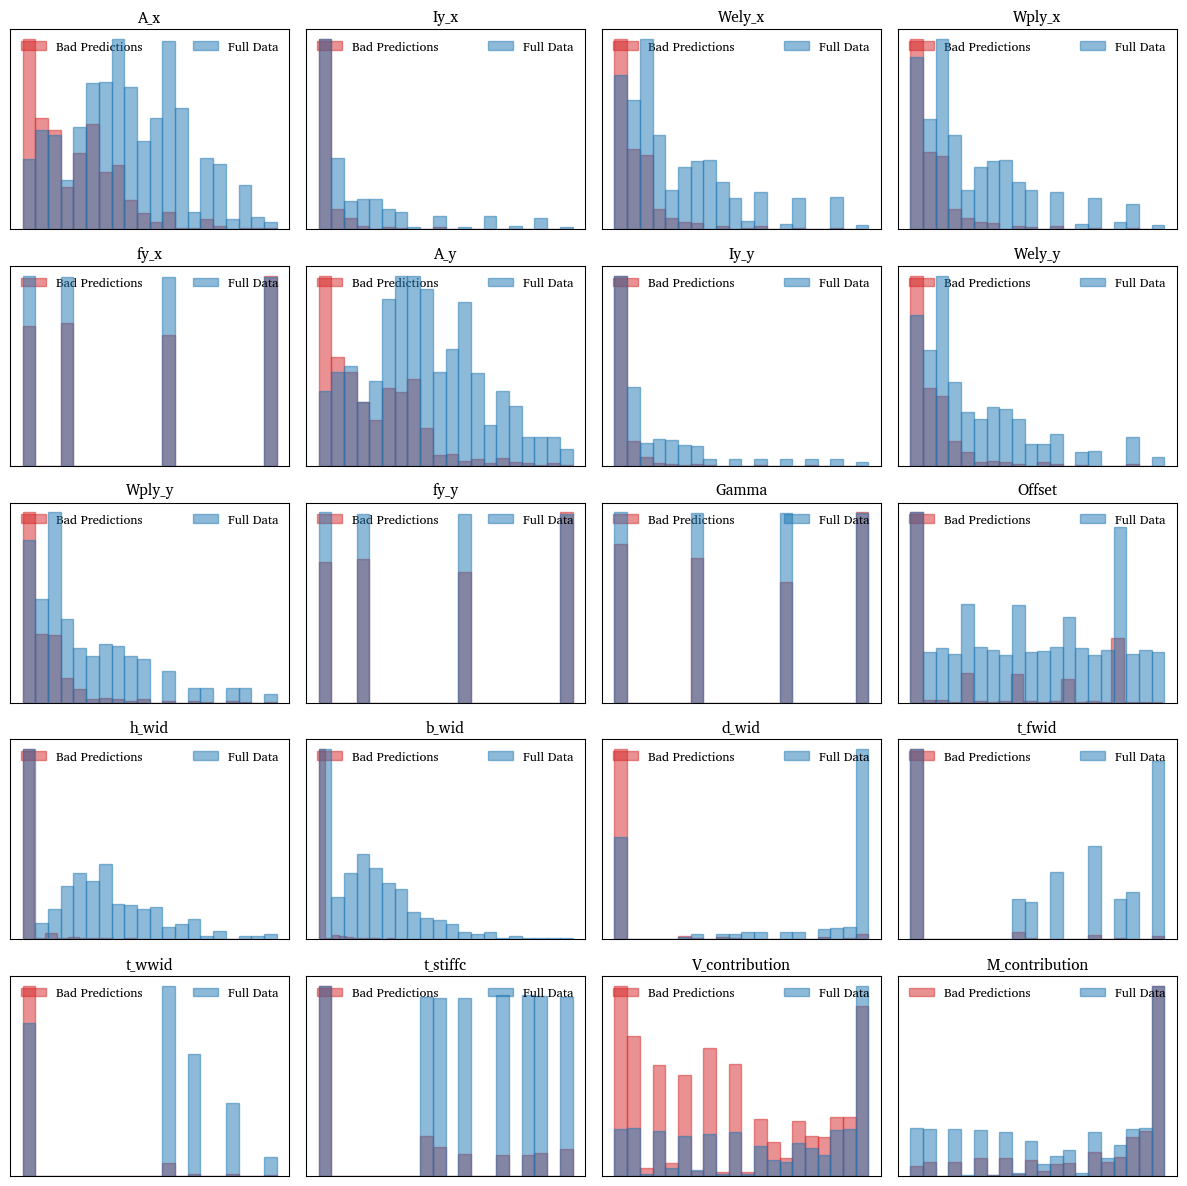

In [110]:
fig, axs = plt.subplots(int(len(model.features)/4), 4, figsize=(12, 12), sharey=False)

for i, feature in enumerate(model.features):
    ax = axs[int(i/4), i%4]
    ax2 = ax.twinx()

    normed_bad_data = (df_test[feature].iloc[worst_predictions].values - df_test[feature].min()) / (df_test[feature].max() - df_test[feature].min())
    normed_full_data = (df_full[feature].values - df_full[feature].min()) / (df_full[feature].max() - df_full[feature].min())

    ax.hist(normed_bad_data, bins=20, 
            edgecolor=plot_params.colors[3], 
            facecolor=plot_params.colors[3],
            alpha=0.5, label='Bad Predictions')
    ax2.hist(normed_full_data, bins=20, 
             edgecolor=plot_params.colors[0],
             facecolor=plot_params.colors[0],
             alpha=0.5, label='Full Data')

    ax.set_title(feature)
    ax.set_xticks([])
    ax.set_yticks([])
    ax2.set_yticks([])
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()

if plot_params.save_figures:
     plt.savefig(rf'Plots\DNN_DistOfBadPreds.svg', format='svg')

plt.show()


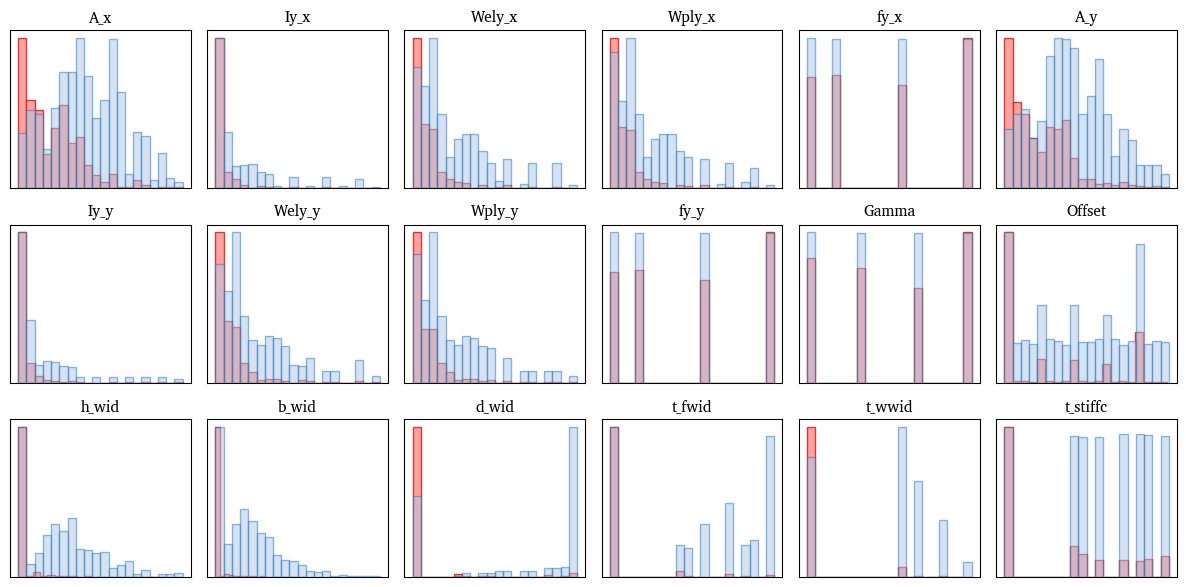

In [111]:
fig, axs = plt.subplots(int(len(model.features)/6), 6, figsize=(12, 6), sharey=False)

for i, feature in enumerate(model.features[:-2]):
    ax = axs[int(i/6), i%6]
    ax2 = ax.twinx()

    normed_bad_data = (df_test[feature].iloc[worst_predictions].values - df_test[feature].min()) / (df_test[feature].max() - df_test[feature].min())
    normed_full_data = (df_full[feature].values - df_full[feature].min()) / (df_full[feature].max() - df_full[feature].min())

    ax2.hist(normed_full_data, bins=20, 
             edgecolor=plot_params.morecolors[0],
             facecolor=plot_params.morecolors[1],
             alpha=0.5, label='Full Data')
    ax.hist(normed_bad_data, bins=20, 
            edgecolor=plot_params.morecolors[6], 
            facecolor=plot_params.morecolors[7],
            alpha=0.9, label='Worst Predictions')

    ax.set_title(feature)
    ax.set_xticks([])
    ax.set_yticks([])
    ax2.set_yticks([])

plt.tight_layout()
if plot_params.save_figures:
     plt.savefig(rf'Plots\DNN_DistOfBadPreds.svg', format='svg')
plt.show()